# Linear Exercise

뉴욕에 위치한 한 이커머스 회사가 있습니다. 이 회사는 온라인에서 옷을 판매하면서 오프라인 스토어에서(in-store) 스타일링이나 옷에 관한 조언을 하는 세션을 열기도 합니다.  
고객들은 스토어에 방문해서 스타일리스트와의 세션이나 미팅을 갖게 되고 집으로 돌아가서 모바일앱 또는 웹사이트에서 원하는 옷을 주문하는 구조입니다.  

이 회사는 모바일앱 또는 웹사이트에 집중해야 할지를 데이터를 기반으로 결정하려고 합니다.

아래 절차를 따라 커스터머 데이터를 분석하세요.

# Imports
**pandas, numpy, matplotlib, sklearn 등 필요할 때마다 라이브러리 추가**

In [2]:
# CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Get the Data

회사에서 제공한 CSV 파일에는 이메일, 주소, 아바타 색깔(Avatar) 등의 고객정보와 함께 아래와 같은 칼럼의 숫자 데이터들이 포함되어있습니다.
> 설명변수
> * Avg. Session Length: 평균 in-store 스타일링 세션 시간
> * Time on App: 앱에서 소비한 시간(분)
> * Time on Website: 웹사이트에서 소비한 시간(분)
> * Length of Membership: 회원가입 기간 (년)

> 타겟데이터
> * Yearly Amount Spent : 회원의 연간 매출 (달러) 

프로젝트는 각 판매 채널에서 고객이 머무른 시간을 설명변수로 회원의 연간 매출을 타겟데이터로 설정합니다.  
이를 통해 고객이 각 운영 채널에서 머무른 시간이 매출에 얼마나 영향을 주는지 파악할 수 있고, 모델링 이후 베타값 분석을 통해 집중투자 해야 할 채널을 선정할 수 있습니다.  
참고로 스타트업은 투자 진행 시 빠른 성장을 도모할 수 있는 의사결정을 합니다.

**EcommerceCustomers.csv 파일을 읽고 df 라는 이름의 DataFrame 을 만들고 첫 5개 샘플을 확인합니다.**

In [3]:
# CODE HERE
df = pd.read_csv('./data/EcommerceCustomers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# 아래 결과값과 비교하며 진행하시면 됩니다. 출력결과를 확인 하는 목적 뿐 아니라 데이터의 이해를 위해서도 출력결과를 꼭 자세히 봐야합니다.
# 샘플데이터의 의미, 데이터의 타입, 설명변수의 의미 정도를 데이터를 통해 확인 하심이 좋습니다.

**info() 메소드를 호출하여 데이터의 간략한 정보를 확인합니다.**

In [5]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
# 결측정보, 데이터타입 확인

## Data Split
현재의 데이터에는 숫자형 데이터뿐 아니라 문자형 데이터도 포함되어 있습니다.  
아직 문자열 데이터의 처리를 학습하지 않았기에 문자열 설명변수 데이터는 제외하고 학습데이터인 X값을 생성하도록 하겠습니다.  
  
**DataFrame에서 타겟데이터인 'Yearly Amount Spent' 는 y로, y데이터를 제외 한 숫자형 데이터만을 선별하여 변수 X 에 저장합니다.**  
**데이터가 의도한 대로 분할 되었는지 X를 호출하여 데이터를 확인합니다.**

In [7]:
# CODE HERE


In [14]:
# 타겟 데이터 'Yearly Amount Spent'를 y로 저장
y = df['Yearly Amount Spent']

# y 데이터를 제외한 숫자형 데이터만 선별하여 X에 저장
# X = df.drop('Yearly Amount Spent', '')
X = df.select_dtypes(include=['float64', 'int64']).drop('Yearly Amount Spent', axis=1)
X = df.select_dtypes(float)
# y = X.pop('Yearly ')
X = df.iloc[:, 3:-1]

# X 데이터 확인
print(X.head())
print("\nX의 형태:", X.shape)
print("\nX의 컬럼:", X.columns.tolist())

   Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308

X의 형태: (500, 4)

X의 컬럼: ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']


**sklearn 의 model_selection.train_test_split 함수를 호출해서 training 데이터와 testing 데이터로 7:3 으로분리하세요.**  
**random_state=42 파라메터를 추가하여 각 데이터셋에 분할되는 데이터를 고정시키겠습니다.**  
**데이터 분할 후 각 데이터셋의 shape을 X_train, X_test, y_train, y_test순으로 확인합니다.**

In [15]:
# CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 4) (150, 4) (350,) (150,)


## Training the Model

**sklearn.linear_model 의 LinearRegression 을 import**

In [16]:
# CODE HERE
from sklearn.linear_model import LinearRegression

In [17]:
# 실행 출력 결과 없음

**LinearRegression() 인스턴스를 생성해서 model 에 저장**

In [18]:
# CODE HERE
lr = LinearRegression()

In [19]:
# 실행 출력 결과 없음

**training 데이터에 대해 모델 학습**

In [20]:
# CODE HERE
lr.fit(X_train, y_train)

LinearRegression()

**학습된 모델의 coefficients 출력**

In [21]:
# CODE HERE
lr.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [22]:
# 파이썬 버전 및 sklearn 버전차이로 값이 근소하게 다를 수 있습니다. 소수점 4~5자리까지 동일하면 됩니다.

## Predicting Test Data

**model.predict() 메소드를 호출하여 X_test 데이터에 대한 모델의 예측값을 확인합니다.**

In [23]:
# CODE HERE
lr_pred = lr.predict(X_test)

In [24]:
# 파이썬 버전 및 sklearn 버전차이로 값이 근소하게 다를 수 있습니다. 소수점 4~5자리까지 동일하면 됩니다.

생성 된 모델의 예측값의 정확도를 시각화 하기 위한 방법으로 많이 사용하는 시각화 방법입니다.  
**실제 정답값(y_test)과 예측값의 관계를 확인하고자 X축에 정답값, y축에 예측값을 전달하여 scatterplot 으로 시각화 하세요.**  
matplotlib는 scatter메소드, seaborn은 scatterplot 메소드를 사용하시면 됩니다.

c:\Users\User\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaV

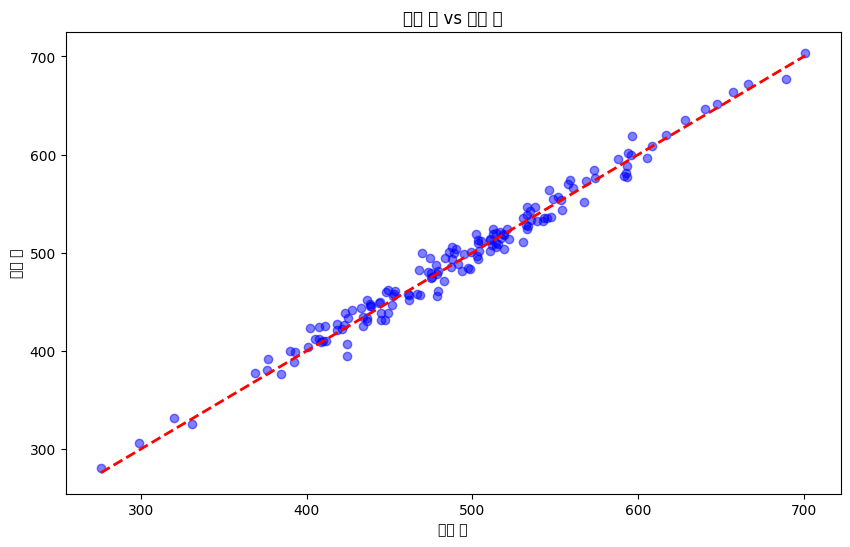

In [25]:
# CODE HERE

import matplotlib.pyplot as plt

# 예측값 계산
lr_pred = lr.predict(X_test)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5)

# 완벽한 예측을 나타내는 대각선 추가
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# 축 레이블과 제목 추가
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값')

# 그래프 표시
plt.show()

In [26]:
# 기울기가 1, 분산이 0에 가까운 직선형태가 보일 수록 모델의 예측 정확도가 높다고 판단하셔도 좋습니다.

## Evaluating the Model
**sklearn 의 metircs중 예측모델 평가지표 출력을 위한 메소드를 import 한 후 R2 score, RMSE를 계산하세요.**

In [27]:
# CODE HERE
from sklearn.metrics import root_mean_squared_error, r2_score

print(r2_score(y_test, lr_pred))
print(root_mean_squared_error(y_test, lr_pred))


0.9808757641125855
10.193897260863155


In [28]:
# 파이썬 버전 및 sklearn 버전차이로 값이 근소하게 다를 수 있습니다. 소수점 4~5자리까지 동일하면 됩니다.

## Conclusion

처음 문제로 돌아와서 모바일앱 또는 웹사이트 중 어떤 채널에 집중하여 투자할지를 결정해야 합니다. 모델링 된 내용에서 결론을 만들어 내는 과정이 중요합니다.  
coefficient 를 살펴보면서 생각해봅시다.  
**아래와 같이 coeffecient 에 대한 DataFrame 을 만드세요.**

In [29]:
# CODE HERE
# pd.DataFrame(lr.coef_)

# coefficient에 대한 DataFrame 생성
pd.DataFrame(lr.coef_, index=X_train.columns, columns=['Coefficients'])

# DataFrame 출력
# print(coef_df)

,Coefficients
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [17]:
# 파이썬 버전 및 sklearn 버전차이로 값이 근소하게 다를 수 있습니다. 소수점 4~5자리까지 동일하면 됩니다.

,Coefficients
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


**베타값을 어떻게 해석할 수 있습니까? 프로젝트 목표인 app채널과 웹사이트의 베타값 해석을 진행해 봅니다.**

In [27]:
'''

베타값(계수)의 해석은 다음과 같이 할 수 있습니다:

1. **Time on App (앱에서 소비한 시간)**: 38.597135
   - 해석: 다른 모든 변수가 일정할 때, 앱에서 소비한 시간이 1분 증가할 때마다 연간 지출액이 평균적으로 약 38.60달러 증가합니다.

2. **Time on Website (웹사이트에서 소비한 시간)**: 0.459148
   - 해석: 다른 모든 변수가 일정할 때, 웹사이트에서 소비한 시간이 1분 증가할 때마다 연간 지출액이 평균적으로 약 0.46달러 증가합니다.

프로젝트 목표인 앱 채널과 웹사이트의 베타값 해석:

1. 앱 채널의 베타값(38.597135)이 웹사이트 채널의 베타값(0.459148)보다 훨씬 큽니다. 이는 앱에서 보내는 시간이 웹사이트에서 보내는 시간보다 연간 지출액에 훨씬 더 큰 영향을 미친다는 것을 의미합니다.

2. 구체적으로, 앱에서 1분을 더 보내는 것이 웹사이트에서 1분을 더 보내는 것보다 약 84배(38.597135 / 0.459148 ≈ 84) 더 큰 영향을 미칩니다.

3. 이는 고객들이 앱을 통해 더 많은 구매를 하거나, 앱 사용 시간이 증가할수록 구매 가능성이 크게 높아진다는 것을 시사합니다.

4. 반면, 웹사이트 사용 시간의 증가는 연간 지출액 증가에 상대적으로 매우 작은 영향을 미칩니다.

이러한 해석을 바탕으로, 회사는 모바일 앱 개발과 마케팅에 더 많은 자원을 투자하는 것이 효과적일 것으로 보입니다. 웹사이트도 여전히 중요하지만, 앱을 통한 고객 참여와 구매 유도가 매출 증대에 더 큰 영향을 미칠 것으로 예상됩니다.
'''

SyntaxError: invalid decimal literal (3727172821.py, line 4)

**모바일앱 또는 웹사이트 중 어떤 채널에 집중투자해야한다고 생각할 수 있나요? 추가적으로 취해야 할 비즈니스 액션은 무엇인가요?**

In [ ]:
'''
분석 결과를 바탕으로, 다음과 같은 결론과 비즈니스 액션을 제안할 수 있습니다:

1. **집중 투자 채널: 모바일 앱**
   - 앱 사용 시간의 베타값(38.597135)이 웹사이트 사용 시간의 베타값(0.459148)보다 약 84배 높습니다.
   - 이는 앱 사용 시간이 연간 지출액에 훨씬 더 큰 영향을 미친다는 것을 의미합니다.
   - 앱 중심으로 맴버쉽 혜택에 투자한다.


2. **추가적인 비즈니스 액션:**

   a) **앱 개선 및 최적화**
      - 사용자 경험(UX) 개선을 통해 앱 사용 시간 증대
      - 앱 내 구매 프로세스 간소화
      - 개인화된 제품 추천 기능 강화

   b) **앱 마케팅 강화**
      - 앱 다운로드 캠페인 실시
      - 앱 사용자를 위한 특별 할인 또는 독점 상품 제공

   c) **앱-웹 연계 전략**
      - 웹사이트에서 앱 다운로드 유도
      - 웹사이트와 앱 간의 원활한 전환 경험 제공

   d) **고객 충성도 프로그램 개발**
      - 앱을 통한 포인트 적립, 리워드 제공 등으로 지속적인 앱 사용 유도

   e) **데이터 분석 강화**
      - 앱 사용 패턴과 구매 행동 간의 상관관계 심층 분석
      - A/B 테스트를 통한 앱 기능 최적화

   f) **웹사이트 역할 재정의**
      - 웹사이트를 정보 제공 및 브랜드 인지도 향상을 위한 채널로 활용
      - 웹사이트에서 앱으로의 전환율 향상에 초점

   g) **오프라인 스타일링 세션과의 연계**
      - 오프라인 세션 후 앱을 통한 추가 상품 추천 및 구매 유도
      - 앱을 통한 스타일링 세션 예약 및 사후 관리 서비스 제공

   h) **모바일 전용 컨텐츠 개발**
      - 앱에서만 볼 수 있는 독점 컨텐츠 제작 (예: 스타일 가이드, 패션 팁 등)

이러한 전략을 통해 앱 사용 시간을 늘리고, 이를 통해 매출 증대를 도모할 수 있을 것입니다. 동시에 웹사이트도 고객 유입 및 정보 제공의 중요한 채널로 유지하면서, 전반적인 디지털 전략을 앱 중심으로 재편하는 것이 효과적일 것입니다.
'''